In [7]:
# Task 1 - Data Preprocessing
import pandas as pd
df = pd.read_csv('proj2_data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Data Preprocessing continued: check missing values
print(df.info())
print(df.describe())
print("The number of missing values is:",
      df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

In [9]:
# Data Preprocessing continued: replace and check missing values
df['CustomerID'] = df['CustomerID'].fillna('Unknown')
df['Description'] = df['Description'].fillna('Unknown')
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [10]:
# Data Preprocessing continued: remove duplicate rows
duplicates = df.duplicated()
total_duplicates = df.duplicated().sum()
print(total_duplicates)

5268


In [11]:
# Data preprocessing: defined the new, cleaned dataframe
df = df.drop_duplicates()

In [12]:
# Data Preprocessing: convert InvoiceDate to datetime format
import datetime as dt

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [13]:
# Guidelines for Analysis - Number 1: Data Overview
print("Dataset Size ")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\n Columns Description ")
print(df.dtypes)
print("\n Date Range ")
print("Earliest date:", df['InvoiceDate'].min())
print("Latest date:", df['InvoiceDate'].max())

Dataset Size 
Rows: 536641
Columns: 8

 Columns Description 
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

 Date Range 
Earliest date: 2010-12-01 08:26:00
Latest date: 2011-12-09 12:50:00


Guidelines for Analysis 1 continued:

1. There are 4373 rows of unique customers and 8 columns.

2. InvoiceNo, StockCode, Description, CustomerID, and Country are all Object data types. Invoice Date was converted to datetime format. Quantity is an integer, and UnitPrice is a float data type. InvoiceNo represents the identification for the purchase, and the stock code represents the identification for what product was purchased. The description is a brief description of the product. Quantiy is the amount of the product that was purchased. InvoiceDate includes the date and time of the purchase. UnitPrice is the price of one unit of the product. CustomerID is the identification for customers and country is the customer's home country.

3. Our dataset covers the period from December 1, 2010 to December 9, 2011.

In [14]:
# Guidelines for Analysis - Number 2: Customer Analysis
print(" Unique Customers ")
unique_customers = df['CustomerID'].nunique()
print(unique_customers)
print("\n Orders per Customer ")
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
print(orders_per_customer.describe())
print("\n Top 5 Customers by Order Count ")
print(orders_per_customer.sort_values(ascending=False).head())

 Unique Customers 
4373

 Orders per Customer 
count    4373.000000
mean        5.922708
std        56.798813
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max      3710.000000
Name: InvoiceNo, dtype: float64

 Top 5 Customers by Order Count 
CustomerID
Unknown    3710
14911.0     248
12748.0     224
17841.0     169
14606.0     128
Name: InvoiceNo, dtype: int64


In [15]:
# Guidelines for Analysis - Number 3: Product Analysis

print(" Top 10 Most Purchased Products ")
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(top_products)
print("\n Average Unit Price of Products ")
print(df['UnitPrice'].mean())
print("\n Revenue By Product ")
df['Revenue'] = df['Quantity'] * df['UnitPrice']
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print(top_revenue)

 Top 10 Most Purchased Products 
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53751
JUMBO BAG RED RETROSPOT              47260
POPCORN HOLDER                       36322
ASSORTED COLOUR BIRD ORNAMENT        36282
PACK OF 72 RETROSPOT CAKE CASES      36016
                                     ...  
Printing smudges/thrown away         -9058
check                               -12030
Unknown                             -13609
Unsaleable, destroyed.              -15644
printing smudges/thrown away        -19200
Name: Quantity, Length: 4221, dtype: int64

 Average Unit Price of Products 
4.632655674836623

 Revenue By Product 
Description
DOTCOM POSTAGE                        206245.480
REGENCY CAKESTAND 3 TIER              164459.490
WHITE HANGING HEART T-LIGHT HOLDER     99612.420
PARTY BUNTING                          98243.880
JUMBO BAG RED RETROSPOT                92175.790
                                         ...    
Bank Charges                           -7175.639
CRUK Commi

In [16]:
# Guidelines for Analysis - Number 4: Time Analysis

df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month'] = df['InvoiceDate'].dt.to_period('M')
print(" Orders by Day of Week ")
print(df['DayOfWeek'].value_counts())
print("\n Orders by Hour ")
print(df['Hour'].value_counts().sort_index())
print("\n Monthly Orders (Seasonality) ")
print(df['Month'].value_counts().sort_index())

 Orders by Day of Week 
DayOfWeek
Thursday     103056
Tuesday      101064
Monday        94435
Wednesday     93715
Friday        81565
Sunday        62806
Name: count, dtype: int64

 Orders by Hour 
Hour
6        41
7       383
8      8906
9     34314
10    48808
11    56949
12    77573
13    71247
14    66572
15    76938
16    54134
17    28371
18     7941
19     3617
20      847
Name: count, dtype: int64

 Monthly Orders (Seasonality) 
Month
2010-12    41981
2011-01    34900
2011-02    27479
2011-03    36439
2011-04    29701
2011-05    36782
2011-06    36609
2011-07    39267
2011-08    35064
2011-09    49861
2011-10    59969
2011-11    83343
2011-12    25246
Freq: M, Name: count, dtype: int64


 Top 5 Countries by Order Count 
Country
United Kingdom    23494
Germany             603
France              461
EIRE                360
Belgium             119
Name: InvoiceNo, dtype: int64

 Average Order Value by Country 
Country
Netherlands    120.059696
Australia      108.910787
Japan           98.716816
Sweden          79.360976
Denmark         48.247147
Name: Revenue, dtype: float64


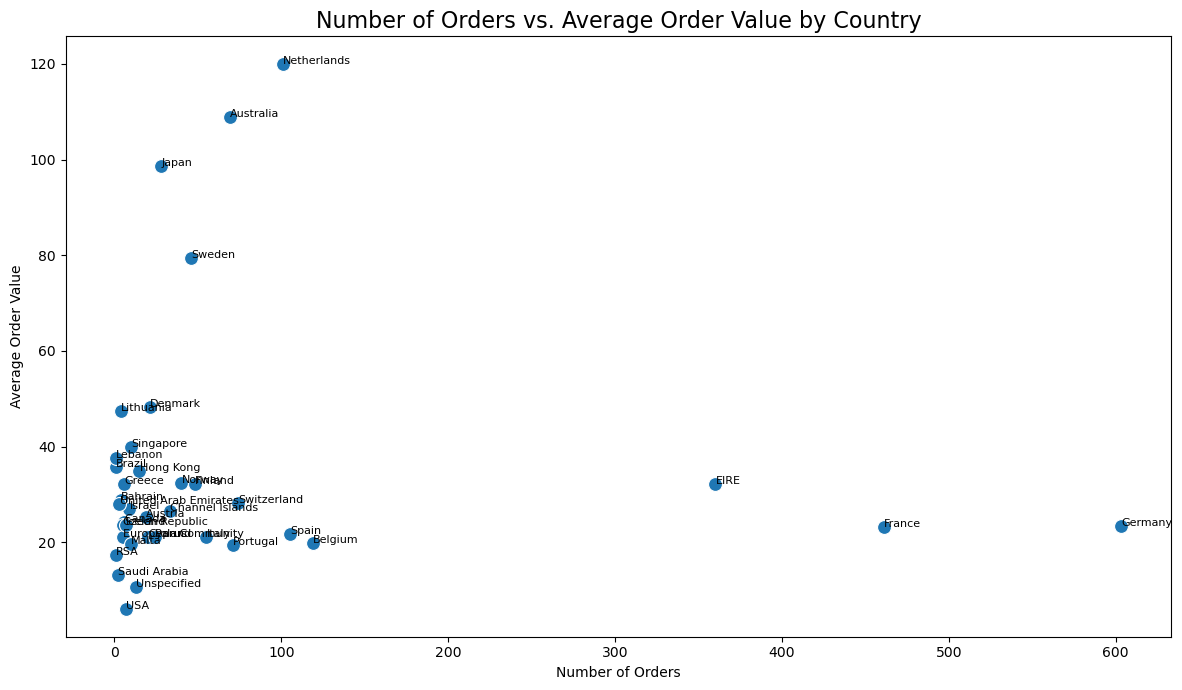

In [17]:
# Guidelines for Analysis - Number 5: Geographical Analysis
import matplotlib.pyplot as plt
import seaborn as sns

print(" Top 5 Countries by Order Count ")
top_countries = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
print(top_countries.head())
print("\n Average Order Value by Country ")
country_aov = df.groupby('Country')['Revenue'].mean().sort_values(ascending=False)
print(country_aov.head())

import matplotlib.pyplot as plt
import seaborn as sns

country_orders = df.groupby('Country')['InvoiceNo'].nunique()

country_aov = df.groupby('Country')['Revenue'].mean()

country_stats = (
    pd.concat([country_orders, country_aov], axis=1)
      .reset_index()
)
country_stats.columns = ['Country', 'NumOrders', 'AvgOrderValue']

country_stats = country_stats[country_stats['Country'] != 'United Kingdom']

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=country_stats,
    x='NumOrders',
    y='AvgOrderValue',
    s=100
)

for _, row in country_stats.iterrows():
    plt.text(row['NumOrders'] + 0.1, row['AvgOrderValue'], row['Country'], fontsize=8)

plt.title('Number of Orders vs. Average Order Value by Country', fontsize=16)
plt.xlabel('Number of Orders')
plt.ylabel('Average Order Value')
plt.tight_layout()
plt.show()

Geographical Analysis continued:

Outside of the United Kingdom, there appears to be a slight negative correlation between average order value and the number of orders per country.

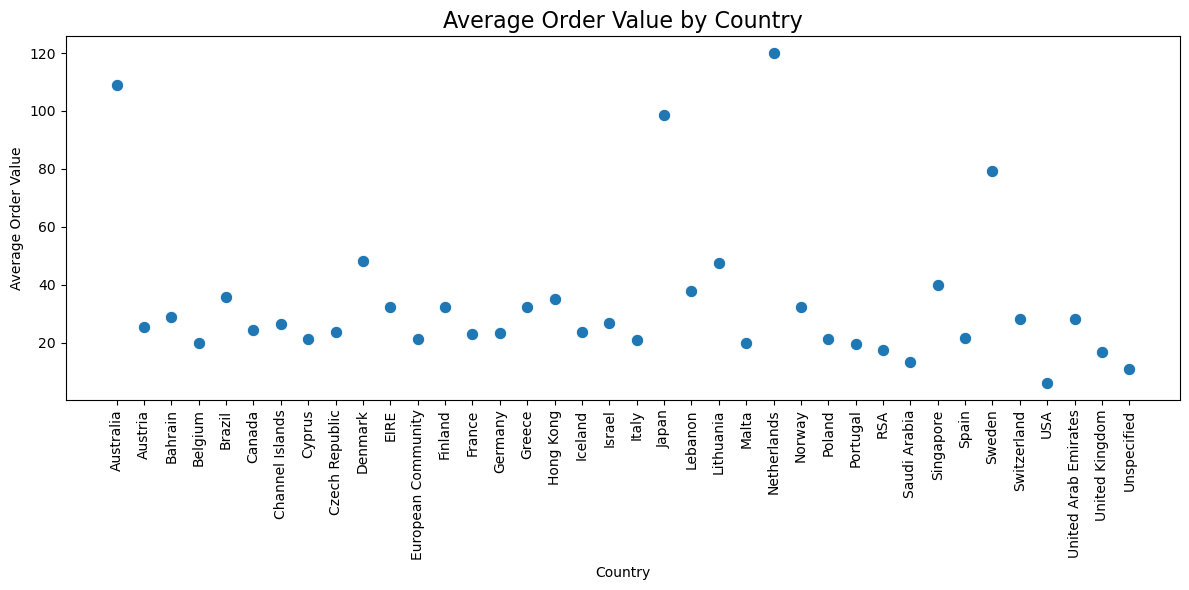

In [18]:
# Geographical Analysis continued
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the Series for easier plotting
country_aov_df = country_aov.reset_index()
country_aov_df.columns = ['Country', 'AverageOrderValue']

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=country_aov_df,
    x='Country',
    y='AverageOrderValue',
    s=80
)

plt.title('Average Order Value by Country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Guidelines for Analysis: Geographical Analysis continued:

Other than the possible slight negative correlation between average order value and the number of orders per country, there seems to be no correlation between customer's country and average order value.

In [19]:
# Guidelines for Analysis - Number 6: Payment Analysis

print("Dataset does NOT contain payment method — cannot analyze payment method trends.")

Dataset does NOT contain payment method — cannot analyze payment method trends.


In [20]:
# Task 2 - RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  
    'InvoiceNo': 'nunique',                                   
    'UnitPrice': 'sum'                                    
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

rfm.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,2.08
12347.0,2,7,481.21
12348.0,75,4,178.71
12349.0,19,1,605.10
12350.0,310,1,65.30
12352.0,36,11,2211.10
12353.0,204,1,24.30
12354.0,232,1,261.22
12355.0,214,1,54.65


In [21]:
# Task 3 - RFM Segmentation
rfm['Recency_rank'] = rfm['Recency'].rank(method='first')
rfm['Frequency_rank'] = rfm['Frequency'].rank(method='first')
rfm['Monetary_rank'] = rfm['Monetary'].rank(method='first')

rfm['R_score'] = pd.qcut(rfm['Recency_rank'], 4, labels=[4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency_rank'], 4, labels=[1,2,3,4]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary_rank'], 4, labels=[1,2,3,4]).astype(int)

rfm['RFM'] = (
    rfm['R_score'] +
    rfm['F_score'] +
    rfm['M_score']
)
print(rfm['RFM'])

CustomerID
12346.0     4
12347.0    12
12348.0     8
12349.0     8
12350.0     4
           ..
18281.0     4
18282.0     9
18283.0    12
18287.0     8
Unknown    12
Name: RFM, Length: 4373, dtype: int64


In [22]:
# Also included are the individual scores for each category
rfm_features = rfm[['R_score', 'F_score', 'M_score']]
rfm_features

,R_score,F_score,M_score
CustomerID,,,
12346.0,1,2,1
12347.0,4,4,4
12348.0,2,3,3
12349.0,3,1,4
12350.0,1,1,2
...,...,...,...
18281.0,1,2,1
18282.0,4,3,2
18283.0,4,4,4


In [26]:
!pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


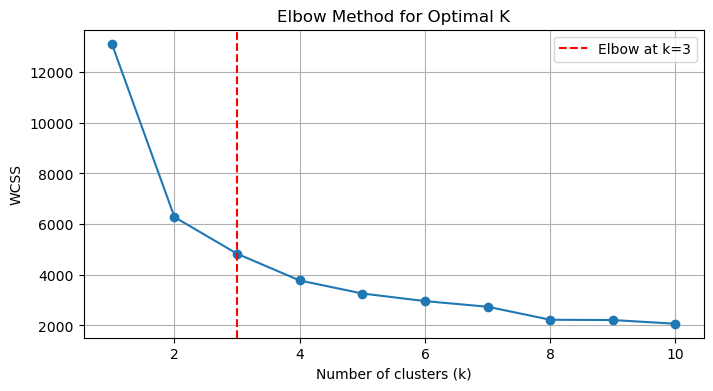

The estimated optimal number of clusters is: 3


In [27]:
# Task 4 - Customer Segmentation
# Use K-Means to find suggested optimal number of clusters
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = kl.elbow
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Elbow at k={optimal_k}')
plt.legend()

plt.show()

print(f"The estimated optimal number of clusters is: {optimal_k}")

In [28]:
# Customer Segmentation continued: experiment with 2 clusters
from sklearn.cluster import KMeans

k = 2

kmeans = KMeans(n_clusters=k, random_state=11)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster')[['R_score','F_score','M_score']].mean()
print(cluster_summary)

          R_score   F_score   M_score
Cluster                              
0        3.208498  3.453557  3.426383
1        1.890166  1.677735  1.701149


In [29]:
# Customer Segmentation continued: experiment with 3 clusters
k = 3

kmeans = KMeans(n_clusters=k, random_state=12)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster')[['R_score','F_score','M_score']].mean()
print(cluster_summary)

          R_score   F_score   M_score
Cluster                              
0        3.225187  3.529883  3.500534
1        1.000000  1.625731  1.750487
2        2.623218  1.797692  1.748133


In [30]:
# Customer Segmentation continued: experiment with 4 clusters
k = 4

kmeans = KMeans(n_clusters=k, random_state=13)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster')[['R_score','F_score','M_score']].mean()
print(cluster_summary)

          R_score   F_score   M_score
Cluster                              
0        1.404454  1.465517  1.503592
1        1.900208  2.980249  3.047817
2        3.359712  1.932854  1.821343
3        3.670042  3.723207  3.702110


In [31]:
# Customer Segmentation continued: 3 clusters selected as optimal number of clusters
k = 3

kmeans = KMeans(n_clusters=k, random_state=12)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster')[['R_score','F_score','M_score']].mean()
print(cluster_summary)

cluster_counts = rfm.groupby('Cluster').size()
print(cluster_counts)

          R_score   F_score   M_score
Cluster                              
0        3.225187  3.529883  3.500534
1        1.000000  1.625731  1.750487
2        2.623218  1.797692  1.748133
Cluster
0    1874
1    1026
2    1473
dtype: int64


5. Segment Profiling

- We will use data from k = 3 clusters, as this data was the most clear. It also supports our findings from the elbow method for optimal k.

- Cluster 0 has the highest means of all three clusters. This means that Cluster 0 contains the most recent customers, the most frequent customers, and those customers that spent the most money. This cluster contains the fewest customers.

- On the other end, Cluster 2 represents the customers that have not purchases recently, are not frequent buyers, and who spent little money on their purchases. This cluster contains the most customers.

- Cluster 1 represents the middle cluster, showing customers who spend an average amount of money are neither frequent nor infrequent customers, and purchase at an average recency.

6. Marketing Recommendations

   Cluster 0: For our most frequent, recent, and highest spending customers, we should create a loyalty or VIP program. This could include early access to products, especially the nicer, more expensive, or more exclusive products (or make some products VIP exclusive). VIP Members could also be sent small letters of thanks or small gifts, particularly around the holidays or the cutomers' birthday. Maintaining these customers is important because it helps maintain a steady source of revenue.
   
   Cluster 1: For our 'average' customers, we should view them as potential candidates to become VIPs. To do so, we could create limited-time offers on more exclusive products and offer incentives such as 'Spend an additional $25 to get a free gift'. We can also send them notifications on how close they are to VIP status and the benefits of reaching that status. This strategy seeks to retain customers and persuade them to reach VIP status, which would generate higher revenue.
   
   Cluster 2: For our rare customers, we should strive to generate more attention to our company. We can focus on marketing strategies such as free shipping for a limited time only or discounts on some select items. This should generate more interest in our company and could attract new customers as well.

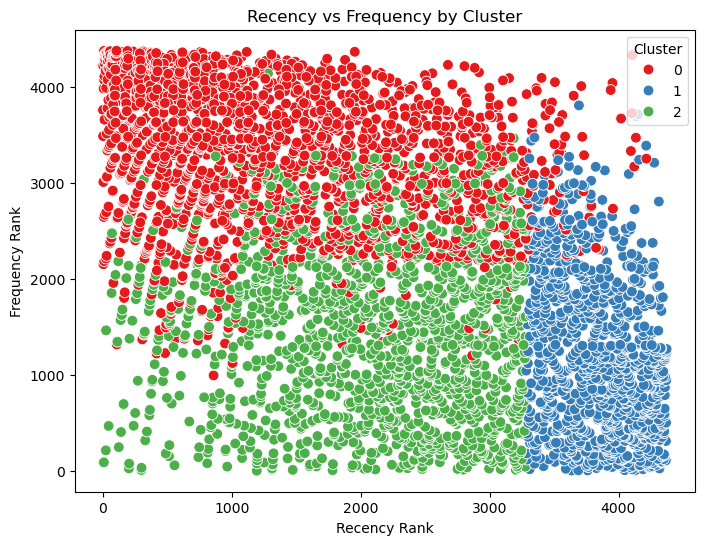

In [32]:
# Task 7 - Visualizations
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency_rank', y='Frequency_rank', hue='Cluster', data=rfm, palette='Set1', s=60)
plt.title('Recency vs Frequency by Cluster')
plt.xlabel('Recency Rank')
plt.ylabel('Frequency Rank')
plt.legend(title='Cluster')
plt.show()


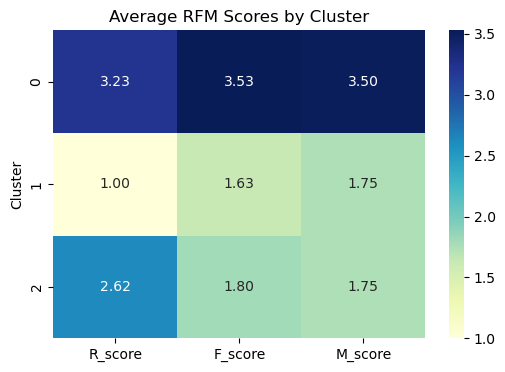

In [33]:
# Visualizations continued
cluster_summary = rfm.groupby('Cluster')[['R_score','F_score','M_score']].mean()

plt.figure(figsize=(6,4))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average RFM Scores by Cluster')
plt.show()


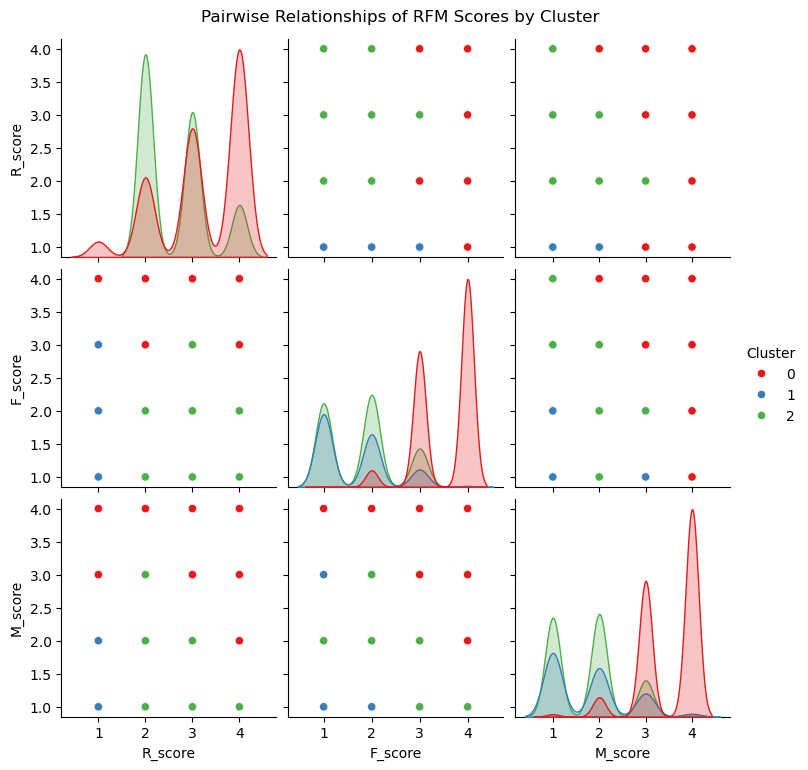

In [34]:
# Visualizations continued
sns.pairplot(rfm, vars=['R_score','F_score','M_score'], hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pairwise Relationships of RFM Scores by Cluster', y=1.02)
plt.show()

In [35]:
# Guidelines for Analysis - Number 7: Customer Behavior

print(" Customer Lifespan (First to Last Purchase) ")
lifespan = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
lifespan['ActiveDays'] = (lifespan['max'] - lifespan['min']).dt.days
print(lifespan['ActiveDays'].describe())

print("\n Sample Lifespan for 10 Customers ")
print(lifespan.head(10))

 Customer Lifespan (First to Last Purchase) 
count    4373.000000
mean      133.440430
std       132.879274
min         0.000000
25%         0.000000
50%        98.000000
75%       256.000000
max       373.000000
Name: ActiveDays, dtype: float64

 Sample Lifespan for 10 Customers 
                           min                 max  ActiveDays
CustomerID                                                    
12346.0    2011-01-18 10:01:00 2011-01-18 10:17:00           0
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00         365
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00         282
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00           0
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00           0
12352.0    2011-02-16 12:33:00 2011-11-03 14:37:00         260
12353.0    2011-05-19 17:47:00 2011-05-19 17:47:00           0
12354.0    2011-04-21 13:11:00 2011-04-21 13:11:00           0
12355.0    2011-05-09 13:49:00 2011-05-09 13:49:00           0
12356.0    2011-01-18 09:

Customer Behavior continued:

As mentioned earlier, it appears that each customer segment (cluster) is divided by purchase behavior recency. However, the range of customer activity does overlap across the clusters.

In [36]:
# Guidelines for Analysis - Number 8: Reurns and Refunds

returns = df[df['Quantity'] < 0]

print(" Percent of Orders with Returns ")
return_rate = (returns['InvoiceNo'].nunique() / df['InvoiceNo'].nunique()) * 100
print(f"{return_rate:.2f}% of orders include returns.")

print("\n Product Categories with Most Returns ")
returns_by_product = returns.groupby('Description')['Quantity'].sum().sort_values().head(10)
print(returns_by_product)

 Percent of Orders with Returns 
19.97% of orders include returns.

 Product Categories with Most Returns 
Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
Unknown                               -46156
printing smudges/thrown away          -19200
Unsaleable, destroyed.                -15644
check                                 -13247
?                                      -9496
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
Printing smudges/thrown away           -9058
Damaged                                -7540
Name: Quantity, dtype: int64


In [37]:
# Guidelines for Analysis - Number 9: Profitability 

print("Dataset does NOT include product cost → cannot compute profit or margin. We can compute Revenue instead.")

# Compute Revenue instead 

df['Revenue'] = df['Quantity'] * df['UnitPrice']
total_revenue = total_revenue = round(df['Revenue'].sum(), 2)
print("Total Revenue is: ", total_revenue)

Dataset does NOT include product cost → cannot compute profit or margin. We can compute Revenue instead.
Total Revenue is:  9726006.95


In [39]:
# Guidelines for Analysis - Number 10: Customer Satisfaction

print("Dataset includes NO ratings/reviews → customer satisfaction analysis not possible.")

Dataset includes NO ratings/reviews → customer satisfaction analysis not possible.
